# Analyse de sentiment des clients des vols à partir des tweets

In [ ]:
# Import some librairies
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, Flatten, Dense, Dropout, Activation, MaxPooling1D, Normalization
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Source de la donnée
#https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [3]:
raw_data = pd.read_csv("/Users/komlan/Project_M2/Deep Learning/dataset/tweets.csv")
raw_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
raw_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Drop unnecessary columns

In [6]:
raw_data = raw_data.drop(["name","tweet_id","tweet_coord"], axis=1)
raw_data = raw_data.rename(columns={"airline_sentiment":"label"})
raw_data.head()

,label,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Combine to the tweets some information like, airline, negative reason, ...

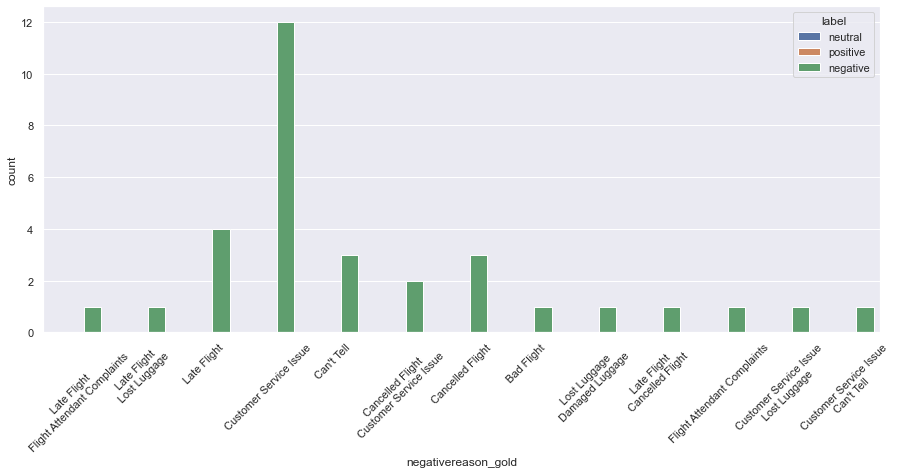

In [8]:
sns.set(rc = {'figure.figsize':(15,6)})
chart = sns.countplot(x="negativereason_gold", hue="label", data=raw_data)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

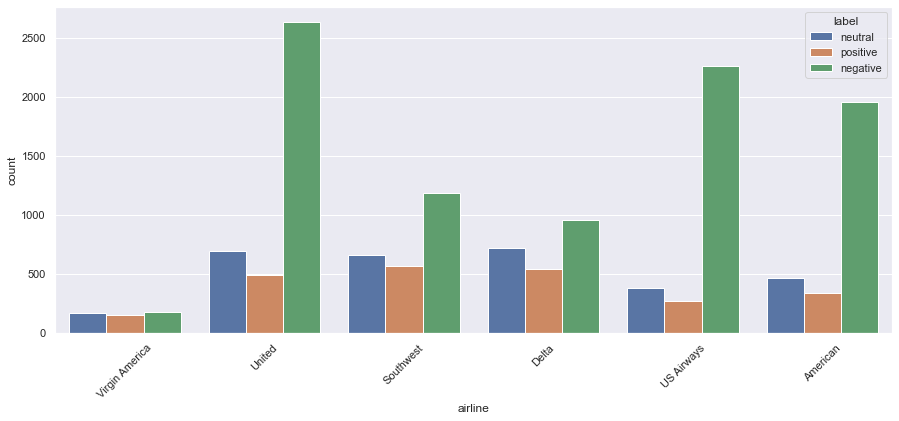

In [9]:
chart = sns.countplot(x="airline", hue="label", data=raw_data)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

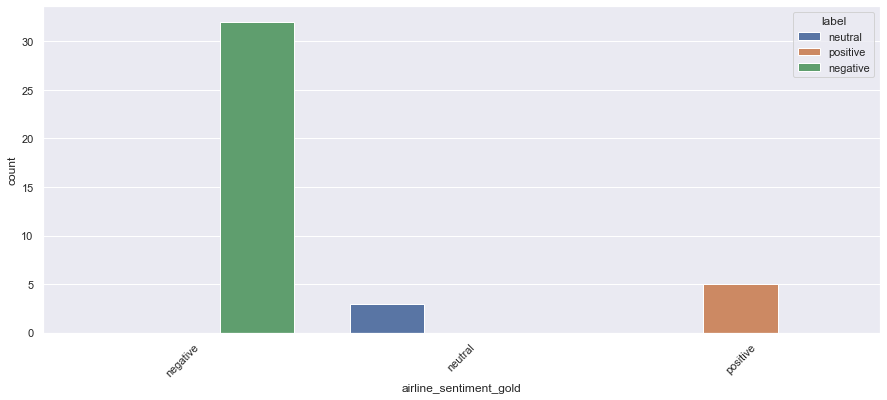

In [10]:
chart = sns.countplot(x="airline_sentiment_gold", hue="label", data=raw_data)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [11]:
combined_columns = ["text","negativereason","airline","airline_sentiment_gold","negativereason_gold","tweet_location","user_timezone"]
raw_data["tweet_infos"] = raw_data[combined_columns].apply(lambda row: ' '.join([el for el in row if not pd.isnull(el)]), axis=1)
data = raw_data[["tweet_infos","airline_sentiment_confidence","negativereason_confidence","label"]]
data

,tweet_infos,airline_sentiment_confidence,negativereason_confidence,label
0,@VirginAmerica What @dhepburn said. Virgin Ame...,1.0000,NaN,neutral
1,@VirginAmerica plus you've added commercials t...,0.3486,0.0000,positive
2,@VirginAmerica I didn't today... Must mean I n...,0.6837,NaN,neutral
3,@VirginAmerica it's really aggressive to blast...,1.0000,0.7033,negative
4,@VirginAmerica and it's a really big bad thing...,1.0000,1.0000,negative
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,0.3487,0.0000,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,1.0000,1.0000,negative
14637,@AmericanAir Please bring American Airlines to...,1.0000,NaN,neutral
14638,"@AmericanAir you have my money, you change my ...",1.0000,0.6659,negative


In [12]:
#Fill NAN values in negativereason_confidence with the mean of the non-null
non_null = [el for el in data["negativereason_confidence"].values if not pd.isnull(el)]
mean_value = np.mean(non_null)
data["negativereason_confidence"] = data["negativereason_confidence"].fillna(mean_value)
#Tranform categrical values for labels
labels_dic = {"negative": 0, "neutral": 1, "positive": 2}
data["label"] = data["label"].apply(lambda x: labels_dic[x])
data

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/4291515865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["negativereason_confidence"] = data["negativereason_confidence"].fillna(mean_value)
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/4291515865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"] = data["label"].apply(lambda x: labels_dic[x])


,tweet_infos,airline_sentiment_confidence,negativereason_confidence,label
0,@VirginAmerica What @dhepburn said. Virgin Ame...,1.0000,0.638298,1
1,@VirginAmerica plus you've added commercials t...,0.3486,0.000000,2
2,@VirginAmerica I didn't today... Must mean I n...,0.6837,0.638298,1
3,@VirginAmerica it's really aggressive to blast...,1.0000,0.703300,0
4,@VirginAmerica and it's a really big bad thing...,1.0000,1.000000,0
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,0.3487,0.000000,2
14636,@AmericanAir leaving over 20 minutes Late Flig...,1.0000,1.000000,0
14637,@AmericanAir Please bring American Airlines to...,1.0000,0.638298,1
14638,"@AmericanAir you have my money, you change my ...",1.0000,0.665900,0


In [13]:
def clean_sentence(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)

data["tweet_infos"] = data["tweet_infos"].apply(lambda raw_text: clean_sentence(raw_text))
data

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/2829236557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet_infos"] = data["tweet_infos"].apply(lambda raw_text: clean_sentence(raw_text))


,tweet_infos,airline_sentiment_confidence,negativereason_confidence,label
0,virginamerica dhepburn said virgin america eas...,1.0000,0.638298,1
1,virginamerica plus added commercials experienc...,0.3486,0.000000,2
2,virginamerica today must mean need take anothe...,0.6837,0.638298,1
3,virginamerica really aggressive blast obnoxiou...,1.0000,0.703300,0
4,virginamerica really big bad thing tell virgin...,1.0000,1.000000,0
...,...,...,...,...
14635,americanair thank got different flight chicago...,0.3487,0.000000,2
14636,americanair leaving 20 minutes late flight war...,1.0000,1.000000,0
14637,americanair please bring american airlines bla...,1.0000,0.638298,1
14638,americanair money change flight answer phones ...,1.0000,0.665900,0


In [14]:
corpus_size = data.shape[0]
tokenizer = Tokenizer(corpus_size)
tokenizer.fit_on_texts(data["tweet_infos"].values)
sequences = tokenizer.texts_to_sequences(data["tweet_infos"].values)
tweet_num = pad_sequences(sequences, padding='post', truncating='post')
tweet_num = pd.DataFrame(tweet_num, columns=["col_"+str(i) for i in range(len(tweet_num[0]))])
#Combine numerical text to the initial dataset
data_final = pd.concat([tweet_num, data[["airline_sentiment_confidence","negativereason_confidence","label"]]], axis=1)
data_final

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_28,col_29,col_30,col_31,col_32,col_33,col_34,airline_sentiment_confidence,negativereason_confidence,label
0,55,7365,177,52,42,7,2,1,5,0,...,0,0,0,0,0,0,0,1.0000,0.638298,1
1,55,517,1192,2737,158,7366,52,42,24,2,...,0,0,0,0,0,0,0,0.3486,0.000000,2
2,55,67,751,538,49,119,116,154,52,42,...,0,0,0,0,0,0,0,0.6837,0.638298,1
3,55,92,4148,5205,5206,1017,3481,4149,36,402,...,0,0,0,0,0,0,0,1.0000,0.703300,0
4,55,92,418,32,449,22,52,42,24,2,...,0,0,0,0,0,0,0,1.0000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,12,43,62,363,3,72,13,0,0,0,...,0,0,0,0,0,0,0,0.3487,0.000000,2
14636,12,416,275,109,18,3,4725,637,305,109,...,0,0,0,0,0,0,0,1.0000,1.000000,0
14637,12,47,631,13,201,13,5976,5975,0,0,...,0,0,0,0,0,0,0,1.0000,0.638298,1
14638,12,338,95,3,303,907,1556,97,2926,8,...,0,0,0,0,0,0,0,1.0000,0.665900,0


In [15]:
X = data_final.drop("label", axis=1)
X = np.array(X)
y = data_final["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print("Train:",(len(X_train), len(y_train)))
print("Test:", (len(X_test), len(y_test)))


Train: (11712, 11712)
Test: (2928, 2928)


# Apply Models

## Neural Network (NN)

In [16]:
row_size = X.shape[0] #number of rows
column_size = X.shape[1] #number of columns
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 3 #number of output neuron
model = Sequential()
model.add(Dense(hidden_layer, input_shape=(column_size,)))
model.add(Dense(hidden_layer, activation='relu'))
model.add(Dense(hidden_layer, activation='relu'))
model.add(Dense(hidden_layer, activation='relu'))
model.add(Dense(output_layer, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3800      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 34,403
Trainable params: 34,403
Non-trainable params: 0
_________________________________________________________________


2022-03-13 12:59:22.651989: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 3s 5ms/step - loss: 35.9533 - accuracy: 0.4788 - val_loss: 10.9432 - val_accuracy: 0.5215
Epoch 2/10
366/366 [==============================] - 1s 4ms/step - loss: 7.0931 - accuracy: 0.4913 - val_loss: 4.4698 - val_accuracy: 0.5553
Epoch 3/10
366/366 [==============================] - 1s 3ms/step - loss: 2.8617 - accuracy: 0.5073 - val_loss: 2.0119 - val_accuracy: 0.4952
Epoch 4/10
366/366 [==============================] - 2s 5ms/step - loss: 1.5301 - accuracy: 0.5459 - val_loss: 1.3888 - val_accuracy: 0.5434
Epoch 5/10
366/366 [==============================] - 2s 4ms/step - loss: 1.2469 - accuracy: 0.5704 - val_loss: 1.3288 - val_accuracy: 0.5803
Epoch 6/10
366/366 [==============================] - 2s 4ms/step - loss: 1.1112 - accuracy: 0.5835 - val_loss: 1.1141 - val_accuracy: 0.6315
Epoch 7/10
366/366 [==============================] - 1s 3ms/step - loss: 1.0718 - accuracy: 0.5888 - val_loss: 1.0586 - val_accuracy: 0.5956
Epoc

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/1779327370.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label="Trainning accuracy", color='green')
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/1779327370.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')


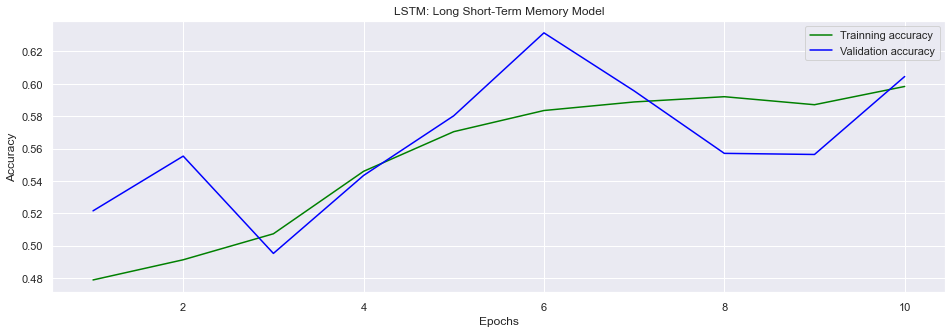

In [18]:
plt.figure(figsize=(16, 5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label="Trainning accuracy", color='green')
plt.plot(epochs, history.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')
plt.title("LSTM: Long Short-Term Memory Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 2. LSTM : Long Short-Term Memory (RNN)

In [19]:
row_size = len(X) #number of rows
column_size = len(X[0]) #number of columns
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 3 #number of output neuron

model_1 = Sequential()
model_1.add(Embedding(input_dim = row_size, output_dim = hidden_layer, input_length = column_size, trainable=True))
model_1.add(LSTM(hidden_layer, dropout=0.5, return_sequences=True))
model_1.add(LSTM(hidden_layer, dropout=0.5))
model_1.add(Dense(output_layer, activation='softmax'))
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           1464000   
                                                                 
 lstm (LSTM)                 (None, 37, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,625,103
Trainable params: 1,625,103
Non-trainable params: 0
_________________________________________________________________


In [20]:
batch_size = 32
epochs = 10
history_1 = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 47s 115ms/step - loss: 0.4474 - accuracy: 0.7957 - val_loss: 0.2983 - val_accuracy: 0.8303
Epoch 2/10
366/366 [==============================] - 43s 119ms/step - loss: 0.2186 - accuracy: 0.9133 - val_loss: 0.1964 - val_accuracy: 0.9249
Epoch 3/10
366/366 [==============================] - 44s 121ms/step - loss: 0.1429 - accuracy: 0.9495 - val_loss: 0.2032 - val_accuracy: 0.9191
Epoch 4/10
366/366 [==============================] - 44s 120ms/step - loss: 0.1111 - accuracy: 0.9630 - val_loss: 0.2290 - val_accuracy: 0.9146
Epoch 5/10
366/366 [==============================] - 44s 121ms/step - loss: 0.0828 - accuracy: 0.9720 - val_loss: 0.2544 - val_accuracy: 0.9187
Epoch 6/10
366/366 [==============================] - 43s 118ms/step - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.3129 - val_accuracy: 0.9020
Epoch 7/10
366/366 [==============================] - 46s 126ms/step - loss: 0.0582 - accuracy: 0.9808 - val_loss: 0.2423 - val_ac

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/3308987612.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_1.history['accuracy'], 'b', label="Trainning accuracy", color='green')
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/3308987612.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_1.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')


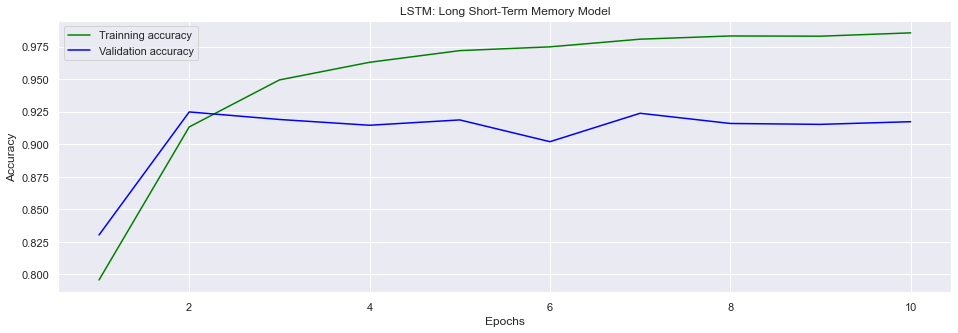

In [21]:
plt.figure(figsize=(16, 5))
epochs = range(1, len(history_1.history['accuracy'])+1)
plt.plot(epochs, history_1.history['accuracy'], 'b', label="Trainning accuracy", color='green')
plt.plot(epochs, history_1.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')
plt.title("LSTM: Long Short-Term Memory Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 2. Convolutional Neural Network (CNN)

In [22]:
row_size = len(X) #number of rows
column_size = len(X[0]) #number of columns
nb_filters = 16
kernel_size = 3
hidden_layer = 100 #number of neuron in hidden layer
output_layer = 3 #number of output neuron

model_2 = Sequential()
#Embedding
model_2.add(Embedding(row_size, hidden_layer, input_length = column_size))

#Convolution
model_2.add(Dropout(0.5))
model_2.add(Conv1D(nb_filters, kernel_size, padding='valid', activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Conv1D(nb_filters, kernel_size, padding='valid', activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Flatten())

#Learning
model_2.add(Dense(hidden_layer, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(output_layer, activation='softmax'))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 37, 100)           1464000   
                                                                 
 dropout (Dropout)           (None, 37, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 35, 16)            4816      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 16)            784       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 16)            0         
 1D)                                                  

In [23]:
batch_size = 32
epochs = 10
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
366/366 [==============================] - 11s 27ms/step - loss: 0.4683 - accuracy: 0.7673 - val_loss: 0.2866 - val_accuracy: 0.8361
Epoch 2/10
366/366 [==============================] - 10s 27ms/step - loss: 0.2849 - accuracy: 0.8312 - val_loss: 0.2551 - val_accuracy: 0.8579
Epoch 3/10
366/366 [==============================] - 11s 31ms/step - loss: 0.1889 - accuracy: 0.9196 - val_loss: 0.1816 - val_accuracy: 0.9293
Epoch 4/10
366/366 [==============================] - 11s 29ms/step - loss: 0.0976 - accuracy: 0.9649 - val_loss: 0.1962 - val_accuracy: 0.9276
Epoch 5/10
366/366 [==============================] - 9s 25ms/step - loss: 0.0615 - accuracy: 0.9794 - val_loss: 0.2343 - val_accuracy: 0.9232
Epoch 6/10
366/366 [==============================] - 9s 26ms/step - loss: 0.0443 - accuracy: 0.9851 - val_loss: 0.2528 - val_accuracy: 0.9214
Epoch 7/10
366/366 [==============================] - 9s 26ms/step - loss: 0.0320 - accuracy: 0.9889 - val_loss: 0.2861 - val_accuracy: 0.

/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/387230114.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_2.history['accuracy'], 'b', label="Trainning accuracy", color='green')
/var/folders/f9/r8b1hbc521q0393y0lfxn0wr0000gn/T/ipykernel_54171/387230114.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history_2.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')


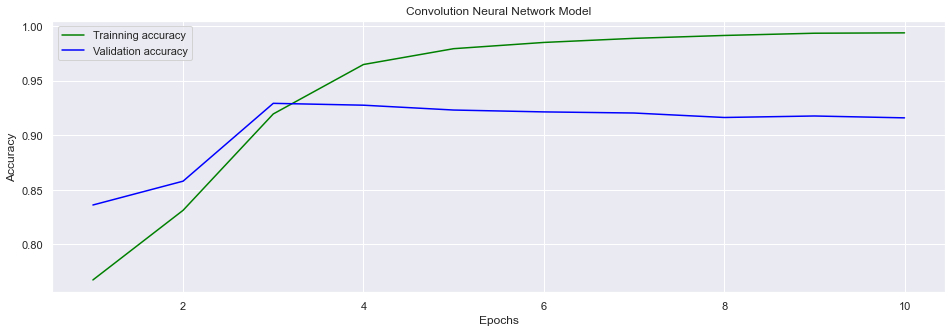

In [24]:
plt.figure(figsize=(16, 5))
epochs = range(1, len(history_2.history['accuracy'])+1)
plt.plot(epochs, history_2.history['accuracy'], 'b', label="Trainning accuracy", color='green')
plt.plot(epochs, history_2.history['val_accuracy'], 'b', label="Validation accuracy", color='blue')
plt.title("Convolution Neural Network Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
## GRU: 